# Complete Case Analysis

# Assumption for CCA

# Advantage

Easy to implement as no data manipulation required

Efficiency variable distribution (if data is Mx64, then the distribution of the variables of the reduced dataset should match the distribution in the original dataset)

### Disadvantage

It can exclude a large fraction of the original dataset (if missing data is abundant)

Excluded observations could be informative for the analysis (if data is not missing at random)

When using our models in production, the model will not know how to handle missing data

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [46]:
df.shape

(19158, 13)

In [47]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [48]:
cols=[var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [49]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
11854,0.910,no_enrollment,Graduate,9.0,60.0
10806,0.624,no_enrollment,Graduate,10.0,4.0
9424,0.926,Full time course,High School,9.0,5.0
13734,0.855,Part time course,Graduate,6.0,58.0
1833,0.926,no_enrollment,Masters,14.0,92.0


In [50]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [51]:
new_df=df[cols].dropna()

In [52]:
new_df.head()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0


In [53]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17182 entries, 0 to 19157
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  17182 non-null  float64
 1   enrolled_university     17182 non-null  object 
 2   education_level         17182 non-null  object 
 3   experience              17182 non-null  float64
 4   training_hours          17182 non-null  float64
dtypes: float64(3), object(2)
memory usage: 805.4+ KB


In [54]:
new_df.isnull().sum()

city_development_index    0
enrolled_university       0
education_level           0
experience                0
training_hours            0
dtype: int64

In [55]:
new_df.shape,df.shape

((17182, 5), (19158, 13))

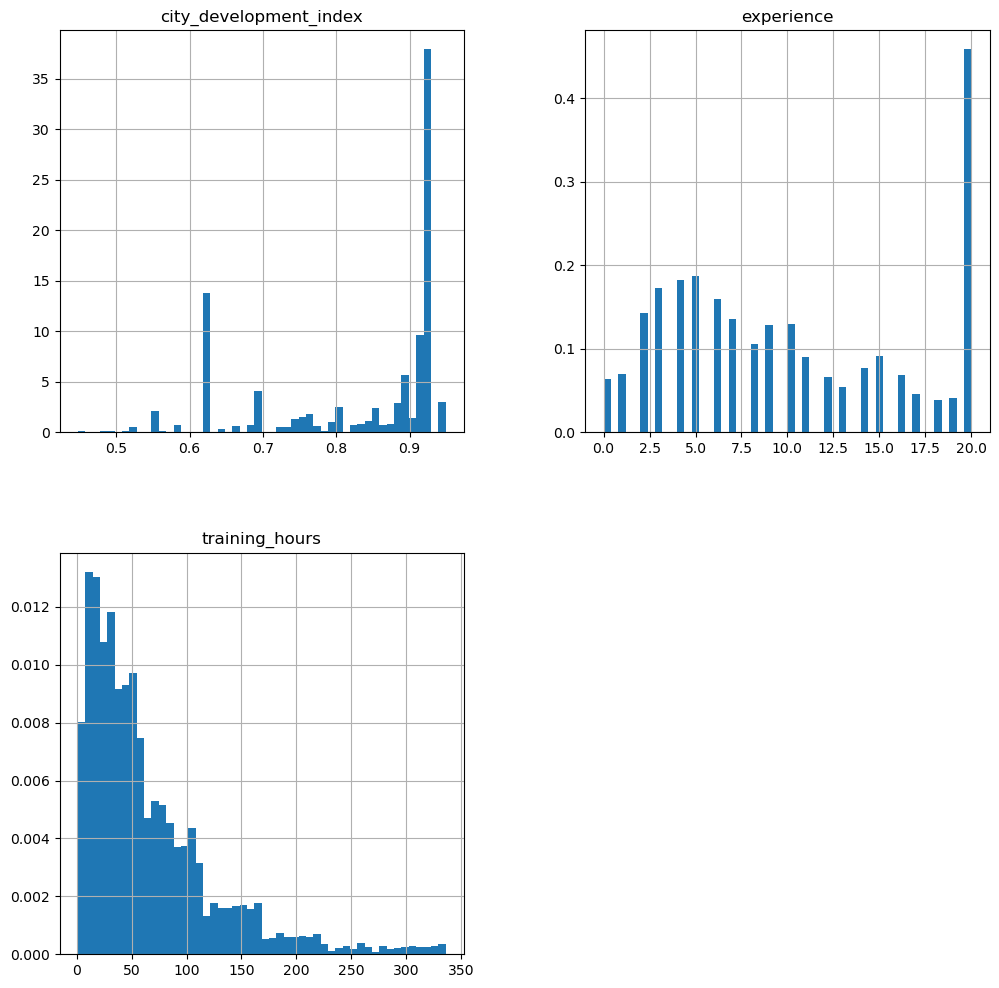

In [56]:
new_df.hist(bins=50,density=True,figsize=(12,12))
plt.show()

<Axes: >

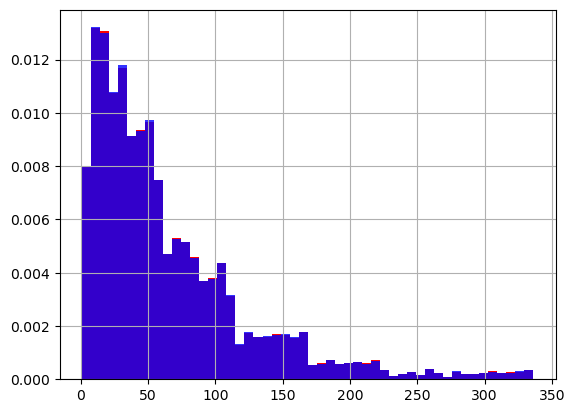

In [67]:
fig=plt.figure()
ax=fig.add_subplot(111)
# Original data
df['training_hours'].hist(bins=50,ax=ax,density=True,color='red')
new_df['training_hours'].hist(bins=50,ax=ax,density=True,color='blue',alpha=0.8)

<Axes: ylabel='Density'>

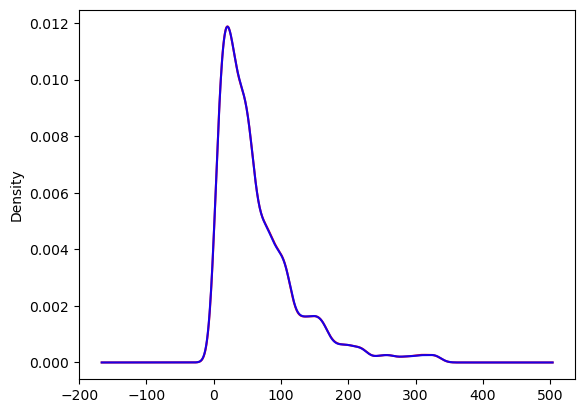

In [71]:
fig=plt.figure()
ax=fig.add_subplot(111)
# original data
df['training_hours'].plot.density(color='red')
# After applying CCA
new_df['training_hours'].plot.density(color='Blue',alpha=0.9)

<Axes: >

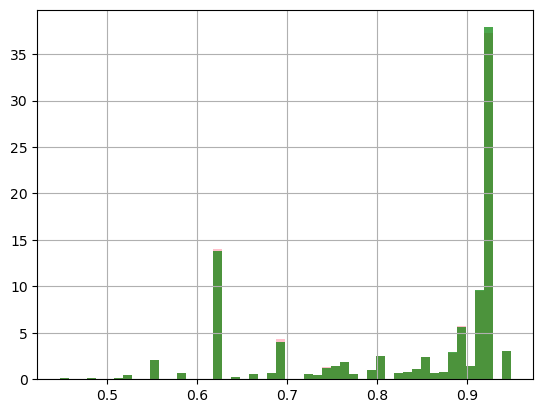

In [72]:
fig=plt.figure()
ax=fig.add_subplot(111)
# Original data 
df['city_development_index'].hist(bins=50,ax=ax,density=True,color='Pink')
# new data 
new_df['city_development_index'].hist(bins=50,ax=ax,density=True,color='Green',alpha=0.7)

<Axes: ylabel='Density'>

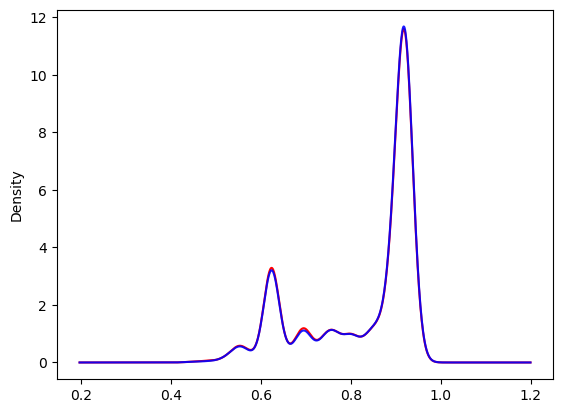

In [73]:
fig=plt.figure()
ax=fig.add_subplot(111)
# original data
df['city_development_index'].plot.density(color='red')
# After applying CCA
new_df['city_development_index'].plot.density(color='Blue',alpha=0.9)

<Axes: >

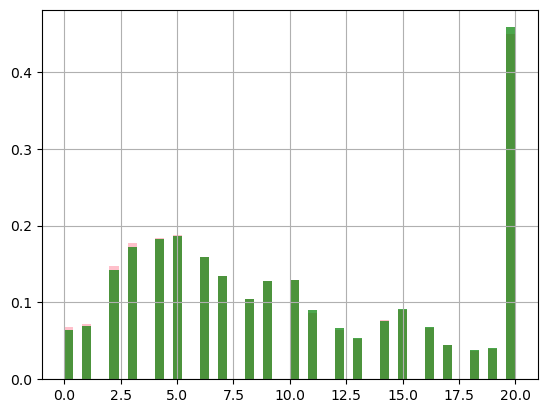

In [75]:
fig=plt.figure()
ax=fig.add_subplot(111)
# Original data 
df['experience'].hist(bins=50,ax=ax,density=True,color='Pink')
# new data 
new_df['experience'].hist(bins=50,ax=ax,density=True,color='Green',alpha=0.7)

<Axes: ylabel='Density'>

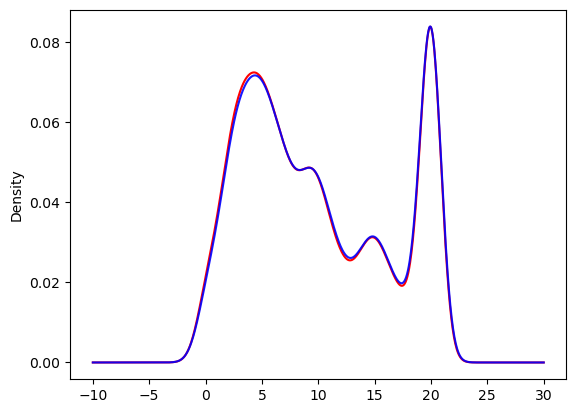

In [76]:
fig=plt.figure()
ax=fig.add_subplot(111)
# original data
df['experience'].plot.density(color='red')
# After applying CCA
new_df['experience'].plot.density(color='Blue',alpha=0.9)

In [81]:
temp=pd.concat([
    # percentage of observation per categories , original data 
    df['education_level'].value_counts()/len(df),
    new_df['education_level'].value_counts()/len(new_df)
], axis=1)
temp.columns=['original', 'cca']
temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


In [82]:
temp=pd.concat([
    # percentage of observation per categories , original data 
    df['enrolled_university'].value_counts()/len(df),
    new_df['enrolled_university'].value_counts()/len(new_df)
], axis=1)
temp.columns=['original', 'cca']
temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079
